In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
def files(f):
    return glob.glob(os.path.join(f))

In [59]:
#creating indexes for each timing file
default_iters = files('iter_default.csv')
default_size = files('lat_default.csv')

mpi_iters = files("./LL_mpi/times/iter_mpi_*.csv")
mpi_size = files("./LL_mpi/times/lat_mpi_*.csv")
mpi_iters.sort()
mpi_size.sort()
mpi_mcstep_iters = mpi_iters[4:8]
mpi_mcstep_size = mpi_size[4:8]
mpi_iters = mpi_iters[0:4]
mpi_size = mpi_size[0:4]

cython_iters = files("./LL_cython/times/iter_cython*.csv")
cython_size = files("./LL_cython/times/lat_cython*.csv")
cython_iters.sort()
cython_size.sort()
cython_mpi_iters = cython_iters[4:8]
cython_mpi_size = cython_size[4:8]
cython_iters = cython_iters[0:4]
cython_size = cython_size[0:4]

numpy_iters = files("./LL_numpy/times/i*.csv")
numpy_size = files("./LL_numpy/times/l*.csv")

numba_iters = files("./LL_numba/times/i*.csv")
numba_size = files("./LL_numba/times/l*.csv")


In [60]:
#returns a combined dataframe for the timings
def create_df(files):
    return pd.concat([pd.read_csv(f, index_col= ['Unnamed: 0']).T for f in files]).sort_index()

In [61]:
#creating a dictionary for every timing dataframe
iters = [default_iters, mpi_iters, mpi_mcstep_iters, cython_iters, cython_mpi_iters, numpy_iters, numba_iters]
size = [default_size, mpi_size, mpi_mcstep_size, cython_size, cython_mpi_size, numpy_size, numba_size]
keys = ['default', 'mpi', 'mpi_mcstep', 'cython', 'cython_mpi', 'numpy', 'numba']
iters_dict = {}
size_dict = {}
for i, k in enumerate(keys):
    iters_dict[k] = create_df(iters[i])
    size_dict[k] = create_df(size[i])

In [42]:
def create_plot(keys):
    fig, ax = plt.subplots(1, 2, figsize = [12,4])
    for key in keys:
        iters_dict[key].T.plot(ax=ax[0], style = 'o-')
        size_dict[key].T.plot(ax=ax[1], style = 'o-')
    ax[0].set_xlabel('Iterations')
    ax[1].set_xlabel('Lattice edge size')
    for i in range(2):
        ax[i].set_ylabel('Time (s)')
        ax[i].grid()
    plt.show()


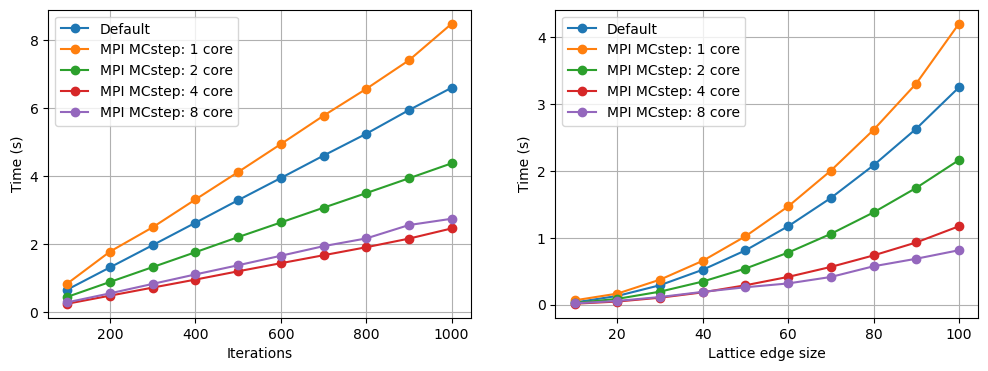

In [43]:
create_plot(['default', 'mpi_mcstep'])

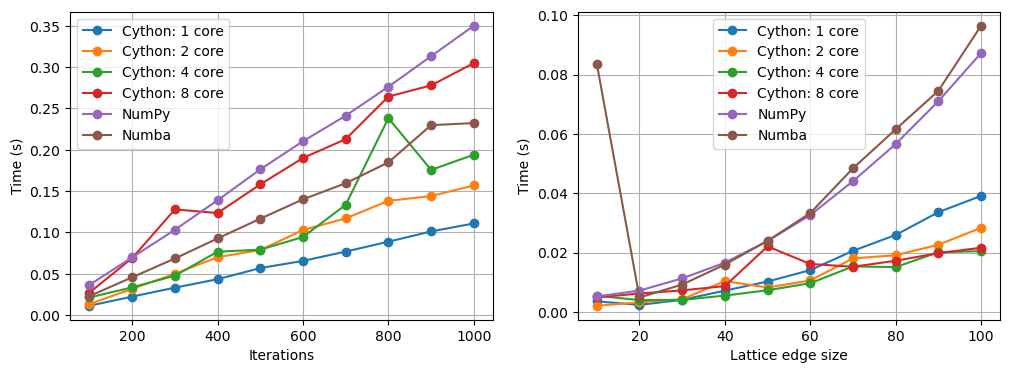

In [62]:
create_plot(['cython', 'numpy', 'numba'])

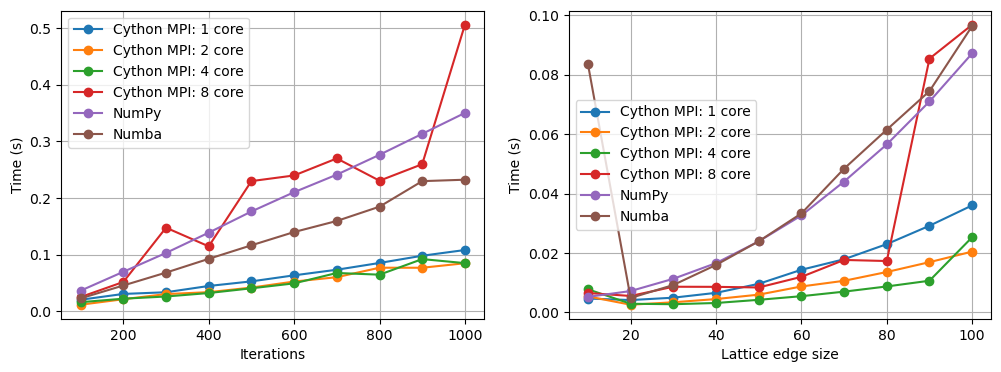

In [63]:
create_plot(['cython_mpi', 'numpy', 'numba'])